improting

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("/content/drive/My Drive/Colab Notebooks/paleo neuroscience/Brain 2 (2)/Brain 2/bird_dino_data.csv")

In [ ]:
df["bodyMass(g)"]=df["Body Mass (kg)"]*1000
df_birds= df.loc[df["Bird vs Dino"] == "B"]
df_dino=df.loc[df["Bird vs Dino"] == "D"]

finding ratios

In [ ]:
def btob_ratio(BorD):
  bodyM=BorD["bodyMass(g)"]
  brainM=BorD["Brain Volume (cm3)"]
  ratio=brainM/bodyM
  return ratio.mean()

In [ ]:
def ptow_ratio(BorD):
  partM=BorD["Cerebrum (cm3)"]
  brainM=BorD["Brain Volume (cm3)"]
  ratio2=partM/brainM
  return ratio2.mean()


In [ ]:
brain2_bodyM = 10**(3.1854*np.log10(297-3.184))/1000
brain2_brainM =25.14
brain2_partM= 14.81

brain2_btob= brain2_brainM/brain2_bodyM
brain2_ptow =brain2_partM/brain2_brainM

creating Varibles

In [ ]:
birds_btob=btob_ratio(df_birds)
print(birds_btob)

0.047832283820074345


In [ ]:
dino_btob=btob_ratio(df_dino)
print(dino_btob)

0.0016106496539985663


In [ ]:
birds_ptow=ptow_ratio(df_birds)
print(birds_ptow)

0.6649507745281171


In [ ]:
dino_ptow=ptow_ratio(df_dino)
print(dino_ptow)

0.4695339305450895


In [ ]:
print(brain2_ptow)
print(brain2_btob)

0.5891010342084327
0.0003455872890914547


Checking to see if Bird or Dino

In [ ]:
def avian_checker(ptow1,ptow2,ptow3,btob1,btob2,btob3): #1=bird,2=dino,3=brain2
  bandb_ptow=abs(ptow1-ptow3)
  dandb_ptow=abs(ptow2-ptow3)
  bandb_btob=abs(btob1-btob3)
  dandb_btob=abs(btob2-btob3)
  if bandb_ptow > dandb_ptow:
    perdiction = "Brain2 cerebrum to brain ratio is less similar to bird cerbrum to brain ratio"
  elif bandb_ptow < dandb_ptow:
    perdiction = "Brain2 cerebrum to brain ratio is less similar to dino cerbrum to brain ratio"

  if bandb_btob > dandb_btob:
    prediction2 = "Brain 2 brain to body mass ratio is less simlar to birds brain to body mass ratio"
  elif bandb_btob < dandb_btob:
    prediction2 = "Brain 2 brain to body mass ratio is less simlar to dino brain to body mass ratio"
  return (perdiction, prediction2)


In [ ]:
  bandb_ptow=abs(birds_ptow-brain2_ptow)
  dandb_ptow=abs(dino_ptow-brain2_ptow)
  bandb_btob=abs(birds_btob-brain2_btob)
  dandb_btob=abs(dino_btob-brain2_btob)

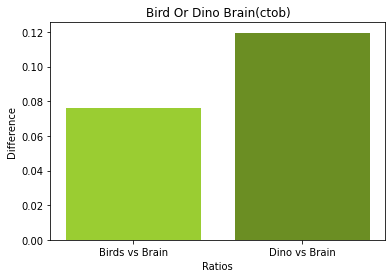

In [ ]:
plt.bar([1,2],[bandb_ptow,dandb_ptow], color = ["yellowgreen","olivedrab"])
plt.xticks([1,2], ["Birds vs Brain","Dino vs Brain",])
plt.ylabel("Difference")
plt.xlabel("Ratios")
plt.title("Bird Or Dino Brain(ctob)")
plt.show()

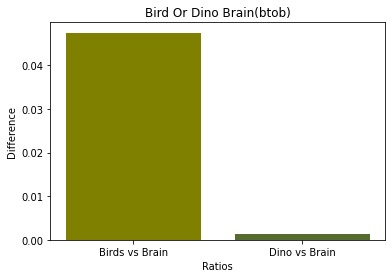

In [ ]:
plt.bar([1,2],[bandb_btob,dandb_btob], color = ["olive","darkolivegreen"])
plt.xticks([1,2], ["Birds vs Brain","Dino vs Brain",])
plt.ylabel("Difference")
plt.xlabel("Ratios")
plt.title("Bird Or Dino Brain(btob)")
plt.show()

In [ ]:
avian_checker(birds_ptow, dino_ptow, brain2_ptow, birds_btob, dino_btob, brain2_btob)

('Brain2 cerebrum to brain ratio is less similar to dino cerbrum to brain ratio',
 'Brain 2 brain to body mass ratio is less simlar to birds brain to body mass ratio')